## Data Cleanup

Now that we loaded the data from switchup website, we need to clean data and prepare them to insert into
database. 

Activities:
* Remove HTML like codes from fields such as Description
* Check for NULL values and decide what to do with them

In [2]:
#imports
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.impute import SimpleImputer

In [3]:
# Load CSV files we downloaded, in order to clean them
badges = pd.read_csv('badges.csv')
comments = pd.read_csv('comments.csv')
schools = pd.read_csv('schools.csv')
locations = pd.read_csv('locations.csv')
courses = pd.read_csv('courses.csv')

#### Remove HTML

In [4]:
def strip_html(str):
    return re.sub('<[^<]+?>', '', str)

In [5]:
schools['description'] = schools.apply(lambda r: strip_html(r['description']), axis=1)
schools.head()

,Unnamed: 0.1,Unnamed: 0,website,description,LogoUrl,school,school_id
0,0,0,www.ironhack.com/en,Ironhack is a global tech school with 9 campus...,https://d92mrp7hetgfk.cloudfront.net/images/si...,ironhack,10828
1,1,0,appacademy.io,"Founded in 2012, App Academy is a world-renown...",https://d92mrp7hetgfk.cloudfront.net/images/si...,app-academy,10525
2,2,0,www.springboard.com/?utm_source=switchup&utm_m...,Springboard is an online learning platform tha...,https://d92mrp7hetgfk.cloudfront.net/images/si...,springboard,11035
3,3,0,anyonecanlearntocode.com/?utm_source=switchup&...,Actualize is a coding bootcamp that values qua...,https://d92mrp7hetgfk.cloudfront.net/images/si...,actualize,10505
4,4,0,learningfuze.com,"LearningFuze is an immersive, 14-week web deve...",https://d92mrp7hetgfk.cloudfront.net/images/si...,learningfuze,10862


In [6]:
badges['description'] = badges.apply(lambda r: strip_html(r['description']), axis=1)
badges.head()

,Unnamed: 0.1,Unnamed: 0,name,keyword,description,school,school_id
0,0,0,Available Online,available_online,School offers fully online courses,ironhack,10828
1,1,1,Verified Outcomes,verified_outcomes,School publishes a third-party verified outcom...,ironhack,10828
2,2,2,Flexible Classes,flexible_classes,School offers part-time and evening classes,ironhack,10828
3,3,0,Available Online,available_online,School offers fully online courses,app-academy,10525
4,4,1,Flexible Classes,flexible_classes,School offers part-time and evening classes,app-academy,10525


In [7]:
comments.head()

,Unnamed: 0.1,Unnamed: 0,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,...,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,0,0,306372,Sergio Burgos,False,NaN,2023.0,False,International Negotiator,The Most Intense Academic Challenge,...,2023-11-10,Data Analytics Bootcamp,{'image': None},3.3,[],3.0,3.0,4.0,After completing my Data Analytics Bootcamp wi...,ironhack
1,1,1,306215,Anonymous,True,NaN,2023.0,True,NaN,Transformative Experience: My Time at Ironhack,...,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,2,2,306068,Anonymous,True,NaN,2023.0,False,Full stack development,Now I can do it,...,2023-10-31,NaN,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
3,3,3,305297,Utku Cikmaz,False,NaN,2023.0,False,Full Stack Web Developer,It was good,...,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
4,4,4,305278,Nirmal Hodge,False,NaN,2023.0,False,Product Designer,Ironhack 100% Worth It!,...,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack


In [8]:
comments['body'] = comments.apply(lambda r: strip_html(r['body']), axis=1)
comments.head()

,Unnamed: 0.1,Unnamed: 0,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,...,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,0,0,306372,Sergio Burgos,False,NaN,2023.0,False,International Negotiator,The Most Intense Academic Challenge,...,2023-11-10,Data Analytics Bootcamp,{'image': None},3.3,[],3.0,3.0,4.0,After completing my Data Analytics Bootcamp wi...,ironhack
1,1,1,306215,Anonymous,True,NaN,2023.0,True,NaN,Transformative Experience: My Time at Ironhack,...,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,2,2,306068,Anonymous,True,NaN,2023.0,False,Full stack development,Now I can do it,...,2023-10-31,NaN,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
3,3,3,305297,Utku Cikmaz,False,NaN,2023.0,False,Full Stack Web Developer,It was good,...,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
4,4,4,305278,Nirmal Hodge,False,NaN,2023.0,False,Product Designer,Ironhack 100% Worth It!,...,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack


#### Decide About empty values

In [9]:
badges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  68 non-null     int64 
 1   Unnamed: 0    68 non-null     int64 
 2   name          68 non-null     object
 3   keyword       68 non-null     object
 4   description   68 non-null     object
 5   school        68 non-null     object
 6   school_id     68 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.8+ KB


In [10]:
comments.head()

,Unnamed: 0.1,Unnamed: 0,id,name,anonymous,hostProgramName,graduatingYear,isAlumni,jobTitle,tagline,...,queryDate,program,user,overallScore,comments,overall,curriculum,jobSupport,review_body,school
0,0,0,306372,Sergio Burgos,False,NaN,2023.0,False,International Negotiator,The Most Intense Academic Challenge,...,2023-11-10,Data Analytics Bootcamp,{'image': None},3.3,[],3.0,3.0,4.0,After completing my Data Analytics Bootcamp wi...,ironhack
1,1,1,306215,Anonymous,True,NaN,2023.0,True,NaN,Transformative Experience: My Time at Ironhack,...,2023-11-06,Web Development Bootcamp,{'image': None},4.0,[],4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,2,2,306068,Anonymous,True,NaN,2023.0,False,Full stack development,Now I can do it,...,2023-10-31,NaN,{'image': None},5.0,[],5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
3,3,3,305297,Utku Cikmaz,False,NaN,2023.0,False,Full Stack Web Developer,It was good,...,2023-10-02,Web Development Bootcamp,{'image': None},4.0,[],5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
4,4,4,305278,Nirmal Hodge,False,NaN,2023.0,False,Product Designer,Ironhack 100% Worth It!,...,2023-09-30,UX/UI Design Bootcamp,{'image': None},5.0,[],5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack


In [11]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  24 non-null     int64 
 1   Unnamed: 0    24 non-null     int64 
 2   website       24 non-null     object
 3   description   24 non-null     object
 4   LogoUrl       24 non-null     object
 5   school        24 non-null     object
 6   school_id     24 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 1.4+ KB


In [12]:
locations.head()

,Unnamed: 0.1,Unnamed: 0,id,description,country.id,country.name,country.abbrev,city.id,city.name,city.keyword,state.id,state.name,state.abbrev,state.keyword,school,school_id
0,0,0,15901,"Berlin, Germany",57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,1,1,16022,"Mexico City, Mexico",29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,2,2,16086,"Amsterdam, Netherlands",59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828
3,3,3,16088,"Sao Paulo, Brazil",42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828
4,4,4,16109,"Paris, France",38.0,France,FR,31136.0,Paris,paris,NaN,NaN,NaN,NaN,ironhack,10828


In [13]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  216 non-null    int64 
 1   Unnamed: 0    216 non-null    int64 
 2   courses       216 non-null    object
 3   school        216 non-null    object
 4   school_id     216 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 8.6+ KB


It seems we don't need to deal that much with null values. We can decide later
if we want to remove them or default them to something.

#### Store cleaned up data

In [14]:
schools.to_csv('schools.csv')
badges.to_csv('badges.csv')
courses.to_csv('courses.csv')
locations.to_csv('locations.csv')
comments.to_csv('comments.csv')

Data for the schema on the dbdesigner.net


    badges {
        name string
        keyword string
        description string
        school string > schools.school
        school_id number
    }

    schools {
        website string
        description string
        LogoUrl string
        school string
        school_id number
    }


    courses {
        courses string
        school string > schools.school
        school_id number
    }

    locations {
       id            number 
       description   string
       country.id    number
       country.name  string
       country.abbrev string
       city.id        number
       city.name      string
       city.keyword   string
       state.id       number
       state.name     string
       state.abbrev   string
       state.keyword  string
       school         string > schools.school
       school_id      number
    }

    comments {
      id               number  
      name            string 
      anonymous       string  
      hostProgramName  string
      graduatingYear   number
      isAlumni         string
      jobTitle         string 
      tagline          string
      body             string 
      rawBody          string 
      createdAt        string 
      queryDate        string 
      program          string 
      user             string
      overallScore     number
     comments         string 
     overall          number
     curriculum       string
     jobSupport       string
     review_body      string
      school           string > schools.school
    }

In [15]:
# Felipe - Data Cleaning

In [16]:
badges = badges[['keyword', 'school' , 'school_id']]
badges.head()

,keyword,school,school_id
0,available_online,ironhack,10828
1,verified_outcomes,ironhack,10828
2,flexible_classes,ironhack,10828
3,available_online,app-academy,10525
4,flexible_classes,app-academy,10525


In [17]:
schools = schools[['school_id', 'school']]
schools.head()

,school_id,school
0,10828,ironhack
1,10525,app-academy
2,11035,springboard
3,10505,actualize
4,10862,learningfuze


In [18]:
courses = courses[['courses', 'school', 'school_id']]
courses.head()

,courses,school,school_id
0,Cyber Security Bootcamp,ironhack,10828
1,Cybersecurity Part-Time,ironhack,10828
2,Data Analytics Bootcamp,ironhack,10828
3,Data Analytics Part-Time,ironhack,10828
4,UX/UI Design Bootcamp,ironhack,10828


In [19]:
locations = locations[['id', 'country.id', 'country.name', 'country.abbrev', 'city.id', 'city.name', 'city.keyword', 'state.id', 'state.name', 'state.abbrev', 'state.keyword', 'school' , 'school_id']]
locations.head()

,id,country.id,country.name,country.abbrev,city.id,city.name,city.keyword,state.id,state.name,state.abbrev,state.keyword,school,school_id
0,15901,57.0,Germany,DE,31156.0,Berlin,berlin,NaN,NaN,NaN,NaN,ironhack,10828
1,16022,29.0,Mexico,MX,31175.0,Mexico City,mexico-city,NaN,NaN,NaN,NaN,ironhack,10828
2,16086,59.0,Netherlands,NL,31168.0,Amsterdam,amsterdam,NaN,NaN,NaN,NaN,ironhack,10828
3,16088,42.0,Brazil,BR,31121.0,Sao Paulo,sao-paulo,NaN,NaN,NaN,NaN,ironhack,10828
4,16109,38.0,France,FR,31136.0,Paris,paris,NaN,NaN,NaN,NaN,ironhack,10828


In [20]:
comments = comments[['graduatingYear', 'jobTitle', 'tagline', 'program', 'overallScore', 'overall', 'curriculum', 'jobSupport', 'review_body', 'school']]
comments.head()

,graduatingYear,jobTitle,tagline,program,overallScore,overall,curriculum,jobSupport,review_body,school
0,2023.0,International Negotiator,The Most Intense Academic Challenge,Data Analytics Bootcamp,3.3,3.0,3.0,4.0,After completing my Data Analytics Bootcamp wi...,ironhack
1,2023.0,NaN,Transformative Experience: My Time at Ironhack,Web Development Bootcamp,4.0,4.0,4.0,4.0,Pros: 1)Intensive Learning 2)Real-World Projec...,ironhack
2,2023.0,Full stack development,Now I can do it,NaN,5.0,5.0,5.0,5.0,"7 months ago, I only had an idea about html an...",ironhack
3,2023.0,Full Stack Web Developer,It was good,Web Development Bootcamp,4.0,5.0,3.0,4.0,"The course was great. Especially, Luis is a gr...",ironhack
4,2023.0,Product Designer,Ironhack 100% Worth It!,UX/UI Design Bootcamp,5.0,5.0,5.0,5.0,I joined the UX/ UI Bootcamp and to be honest ...,ironhack


In [21]:
#  Comments - Mean of OverallScore of each school 

# Sort the DataFrame by 'school' and 'overallScore' in descending order
comments_sorted = comments.sort_values(by=['school', 'overallScore'], ascending=[True, False])

# Reset index to move 'school' from index to a regular column
comments_sorted = comments_sorted.reset_index()

# Group by 'school' and calculate the mean overall score for each school
school_overall_scores = comments_sorted.groupby('school')['overallScore'].mean().reset_index()

# Sort the result by mean overall score in descending order
school_overall_scores = school_overall_scores.sort_values(by='overallScore', ascending=False)

# Display the result
print(school_overall_scores)


              school  overallScore
15      learningfuze      4.984659
6       code-platoon      4.928440
5          clarusway      4.924167
7          codesmith      4.914286
14      knowledgehut      4.909170
19     tech-elevator      4.903587
8          codeworks      4.893293
0     4geeks-academy      4.880556
10     coding-temple      4.879167
1          actualize      4.869469
11       devcodecamp      4.840206
20          tech-i-s      4.806364
22         tripleten      4.797129
21  the-tech-academy      4.769186
12      hack-reactor      4.740705
13          ironhack      4.735781
2          altcademy      4.695631
17        skillcrush      4.687500
3        app-academy      4.600502
18       springboard      4.595061
4       brainstation      4.499363
16            nucamp      4.472946
9        coding-dojo      4.428279
23           udacity      4.392669


In [22]:
total_comments_per_school = comments['school'].value_counts()

# Display the total comments for each school
print("Total comments for each school:")
print(total_comments_per_school)

Total comments for each school:
springboard         1559
udacity             1405
ironhack            1285
app-academy         1198
nucamp               706
coding-dojo          490
actualize            452
the-tech-academy     345
brainstation         314
hack-reactor         312
codesmith            308
clarusway            240
knowledgehut         229
tech-elevator        223
tripleten            209
altcademy            206
devcodecamp          195
4geeks-academy       180
learningfuze         176
coding-temple        168
codeworks            164
skillcrush           145
tech-i-s             110
code-platoon         109
Name: school, dtype: int64


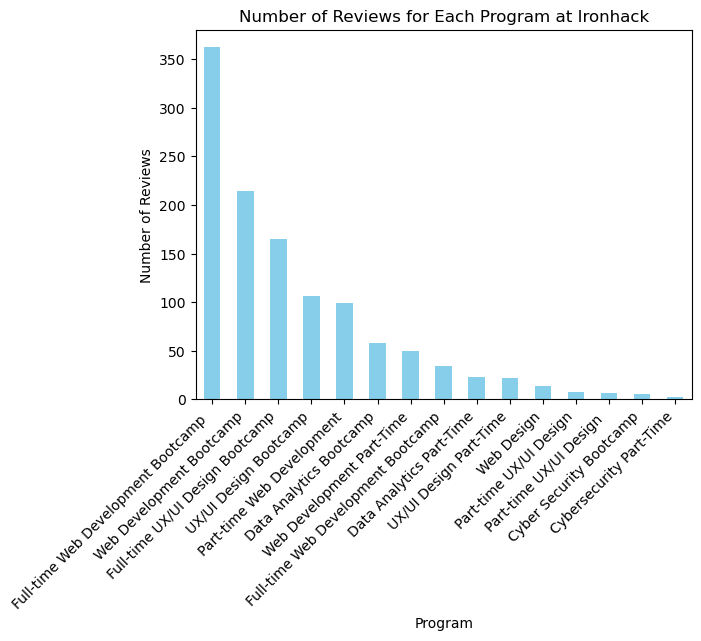

In [23]:
ironhack_reviews_per_program = comments[comments['school'] == 'ironhack']['program'].value_counts()

# Plot the number of reviews for each program
ironhack_reviews_per_program.plot(kind='bar', color='skyblue')
plt.xlabel('Program')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Program at Ironhack')
plt.xticks(rotation=45, ha='right') 
plt.show()

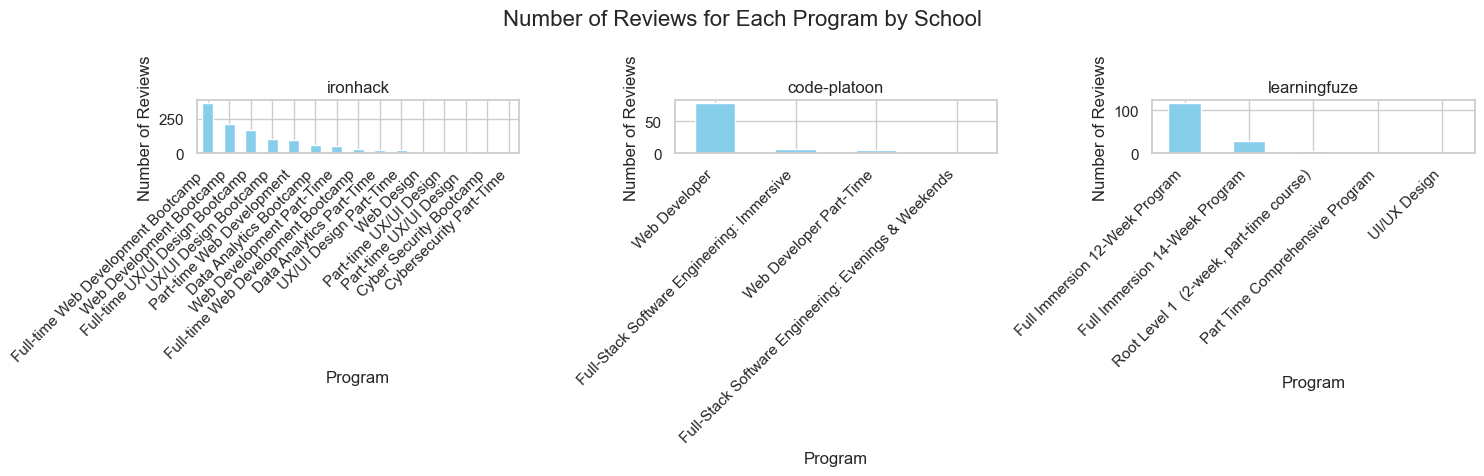

In [50]:
selected_schools = ['ironhack', 'code-platoon', 'learningfuze']

# Filter the DataFrame for the specified schools
selected_reviews = comments[comments['school'].isin(selected_schools)]

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_schools), figsize=(15, 5))
fig.suptitle('Number of Reviews for Each Program by School', fontsize=16)

# Plot the number of reviews for each program and school
for i, school in enumerate(selected_schools):
    ax = axes[i]

    school_reviews_per_program = selected_reviews[selected_reviews['school'] == school]['program'].value_counts()
    school_reviews_per_program.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(school)
    ax.set_xlabel('Program')
    ax.set_ylabel('Number of Reviews')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()

In [24]:
# Number of coursers that each school are having atm

course_counts = courses.groupby('school')['courses'].count()
course_counts = course_counts.sort_values(ascending=False)
course_counts


school
udacity             33
the-tech-academy    33
clarusway           31
brainstation        20
springboard         13
knowledgehut         9
coding-dojo          9
ironhack             8
app-academy          7
tripleten            5
codesmith            5
coding-temple        5
nucamp               5
learningfuze         5
4geeks-academy       4
altcademy            4
actualize            3
skillcrush           3
codeworks            3
code-platoon         3
devcodecamp          2
tech-elevator        2
tech-i-s             2
hack-reactor         2
Name: courses, dtype: int64

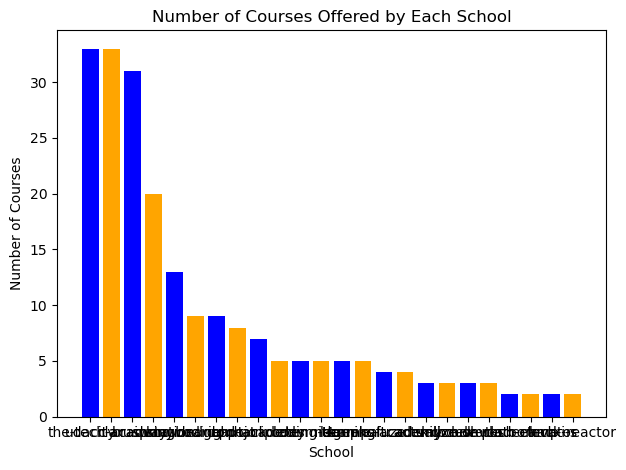

In [25]:
# Plotting the bar chart
plt.bar(course_counts.index, course_counts.values, color=['blue', 'orange'])
plt.xlabel('School')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Offered by Each School')
plt.tight_layout()
plt.show()

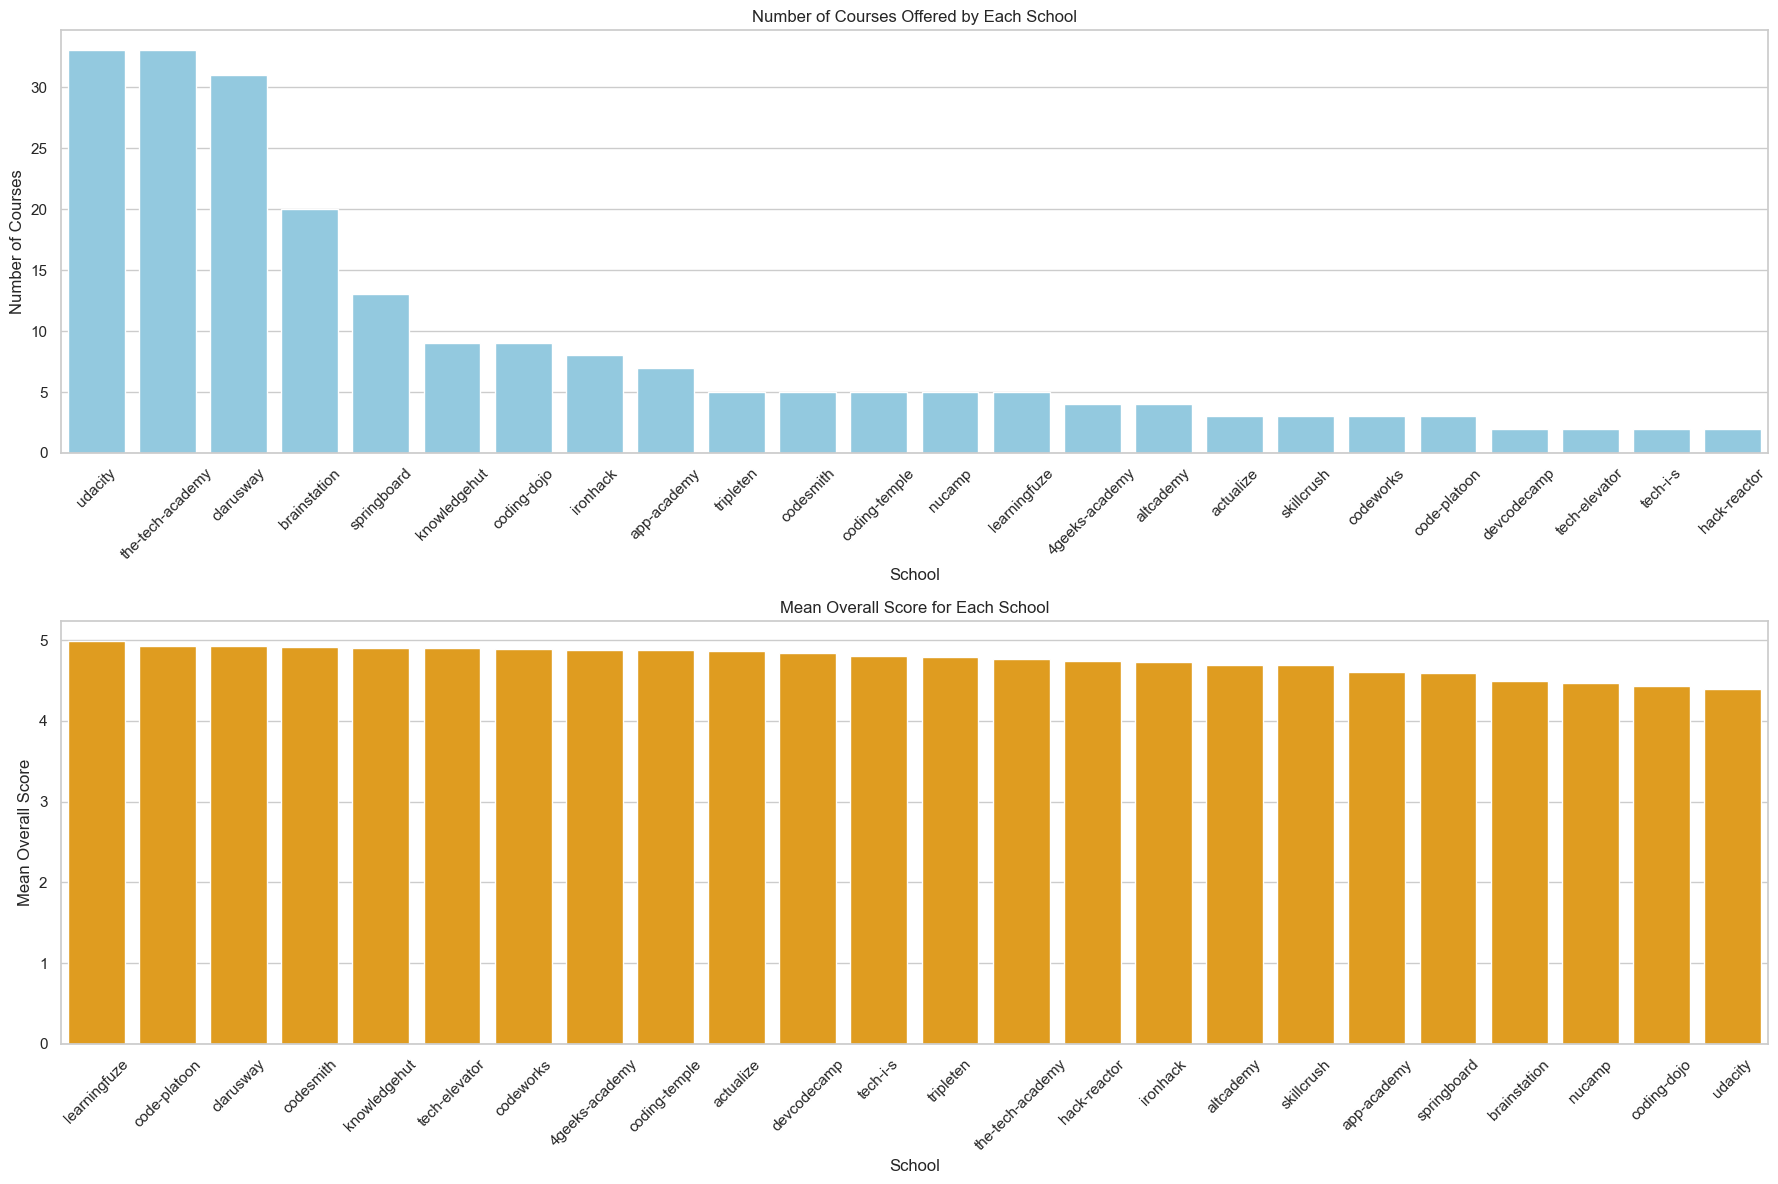

In [26]:
# Set the overall style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# Plot the number of courses each school is offering
sns.barplot(x=course_counts.index, y=course_counts.values, color='skyblue', ax=ax1)
ax1.set_xlabel('School')
ax1.set_ylabel('Number of Courses')
ax1.set_title('Number of Courses Offered by Each School')

# Plot the mean overall score for each school
sns.barplot(x=school_overall_scores['school'], y=school_overall_scores['overallScore'], color='orange', ax=ax2)
ax2.set_xlabel('School')
ax2.set_ylabel('Mean Overall Score')
ax2.set_title('Mean Overall Score for Each School')

# Rotate x-axis labels for better visibility
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

C:\Users\lipyc\AppData\Local\Temp\ipykernel_24264\2436287580.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = comments.corr()


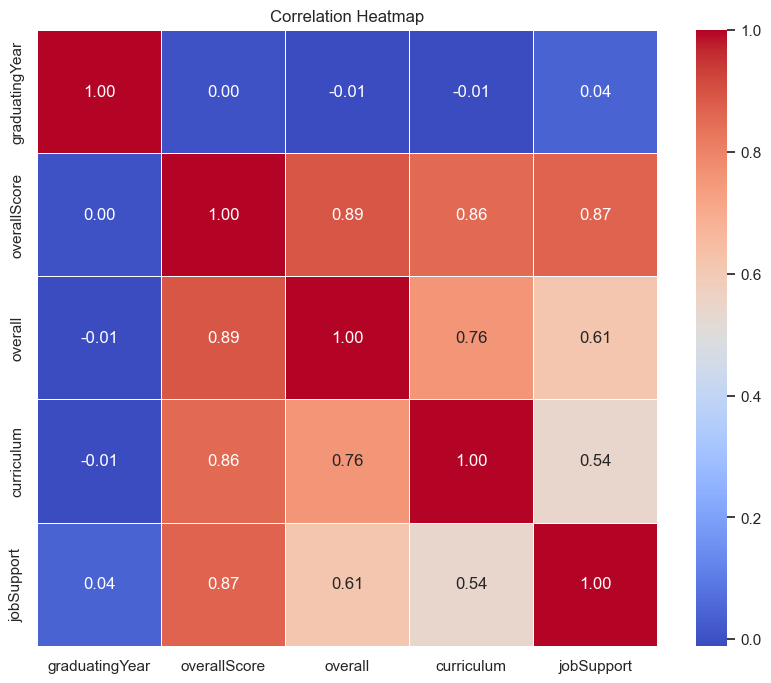

In [27]:
correlation_matrix = comments.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# All the comments for IronHack

ironhack_comments = comments[comments['school'] == 'ironhack']
ironhack_comments_sorted = ironhack_comments.sort_values(by='overallScore', ascending=False)

# Display the comments for IronHack
display(ironhack_comments_sorted)

,graduatingYear,jobTitle,tagline,program,overallScore,overall,curriculum,jobSupport,review_body,school
640,2019.0,Jr Fullstack web developer,The reality behind Ironhack,Full-time Web Development Bootcamp,5.0,5.0,5.0,5.0,"The truth is, as an attendee in Ironhack, I wa...",ironhack
809,2018.0,NaN,"Web Development in Paris, May 2018",Full-time Web Development Bootcamp,5.0,5.0,5.0,5.0,I’ve just finished the full-time web developme...,ironhack
817,2018.0,Software Developer,Ironhack --- Life changing experience,NaN,5.0,5.0,5.0,5.0,Ironahck meant more than just another educatio...,ironhack
816,2018.0,Web Developer,Best place to learn how to code,Part-time Web Development,5.0,5.0,5.0,5.0,I was a digital artist who worked as a full ti...,ironhack
815,2018.0,NaN,Definitely worth it - but go in prepared to wo...,Full-time Web Development Bootcamp,5.0,5.0,5.0,5.0,"I chose Ironhack because of its reputation, an...",ironhack
...,...,...,...,...,...,...,...,...,...,...
1249,2015.0,NaN,Web Development Bootcamp,Part-time Web Development,NaN,NaN,NaN,NaN,Four years ago I finished my architecture degr...,ironhack
1256,2016.0,NaN,An amazing experience,Part-time Web Development,NaN,NaN,NaN,NaN,My 8 weeks at Ironhack Miami were a whirlwind....,ironhack
1259,2015.0,NaN,Ironhack Review,Part-time Web Development,NaN,NaN,NaN,NaN,My experience at Ironhack was unlike anything ...,ironhack
1261,2015.0,NaN,Best decision I have ever made!,Part-time Web Development,NaN,NaN,NaN,NaN,"This course blew me away, the instructors were...",ironhack


In [29]:
ironhack_overallscore_counts = comments[comments['school'] == 'ironhack']['overallScore'].value_counts().sort_index(ascending=False)

# Display unique overallScore values and their counts for ironhack in descending order
print("Unique overallScore values and their counts for ironhack (descending order):")
for score, count in ironhack_overallscore_counts.items():
    print(f"Overall Score: {score}, Count: {count}")

Unique overallScore values and their counts for ironhack (descending order):
Overall Score: 5.0, Count: 880
Overall Score: 4.7, Count: 179
Overall Score: 4.5, Count: 4
Overall Score: 4.3, Count: 87
Overall Score: 4.0, Count: 59
Overall Score: 3.7, Count: 21
Overall Score: 3.3, Count: 12
Overall Score: 3.0, Count: 8
Overall Score: 2.7, Count: 6
Overall Score: 2.3, Count: 4
Overall Score: 2.0, Count: 2
Overall Score: 1.7, Count: 4
Overall Score: 1.3, Count: 3
Overall Score: 1.0, Count: 11


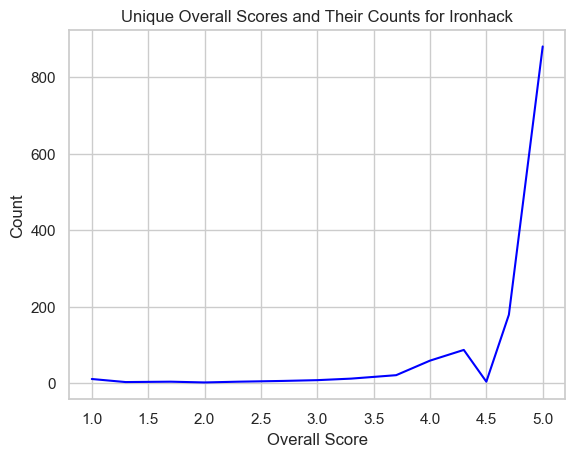

In [30]:
ironhack_overallscore_counts = comments[comments['school'] == 'ironhack']['overallScore'].value_counts().sort_index(ascending=False)

# Plot unique overallScore values and their counts for ironhack in descending order
plt.plot(ironhack_overallscore_counts.index, ironhack_overallscore_counts.values, color='blue')
plt.xlabel('Overall Score')
plt.ylabel('Count')
plt.title('Unique Overall Scores and Their Counts for Ironhack')
plt.show()

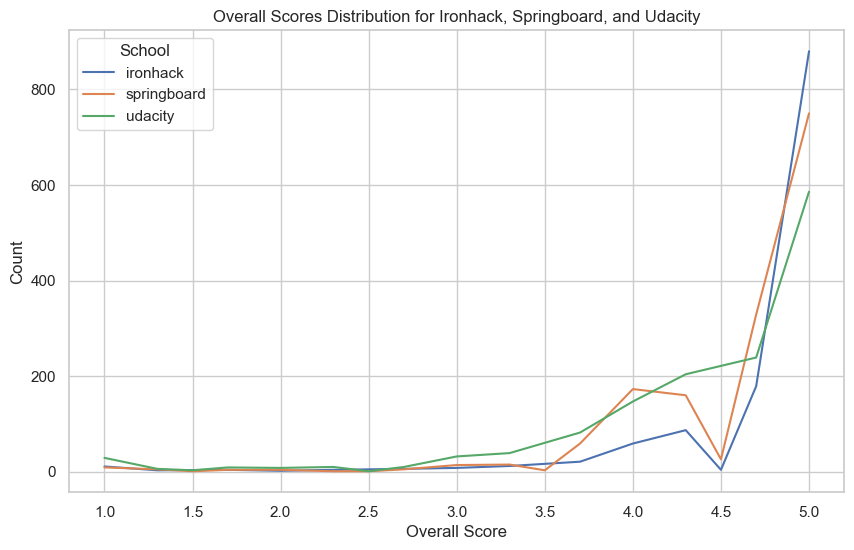

In [31]:
selected_schools = ['ironhack', 'springboard', 'udacity']
selected_data = comments[comments['school'].isin(selected_schools)]

# Set the overall style
sns.set(style="whitegrid")

# Create line plots for each school
plt.figure(figsize=(10, 6))
for school in selected_schools:
    school_data = selected_data[selected_data['school'] == school]
    school_overallscore_counts = school_data['overallScore'].value_counts().sort_index(ascending=False)
    plt.plot(school_overallscore_counts.index, school_overallscore_counts.values, label=school)

plt.xlabel('Overall Score')
plt.ylabel('Count')
plt.title('Overall Scores Distribution for Ironhack, Springboard, and Udacity')
plt.legend(title='School')
plt.show()

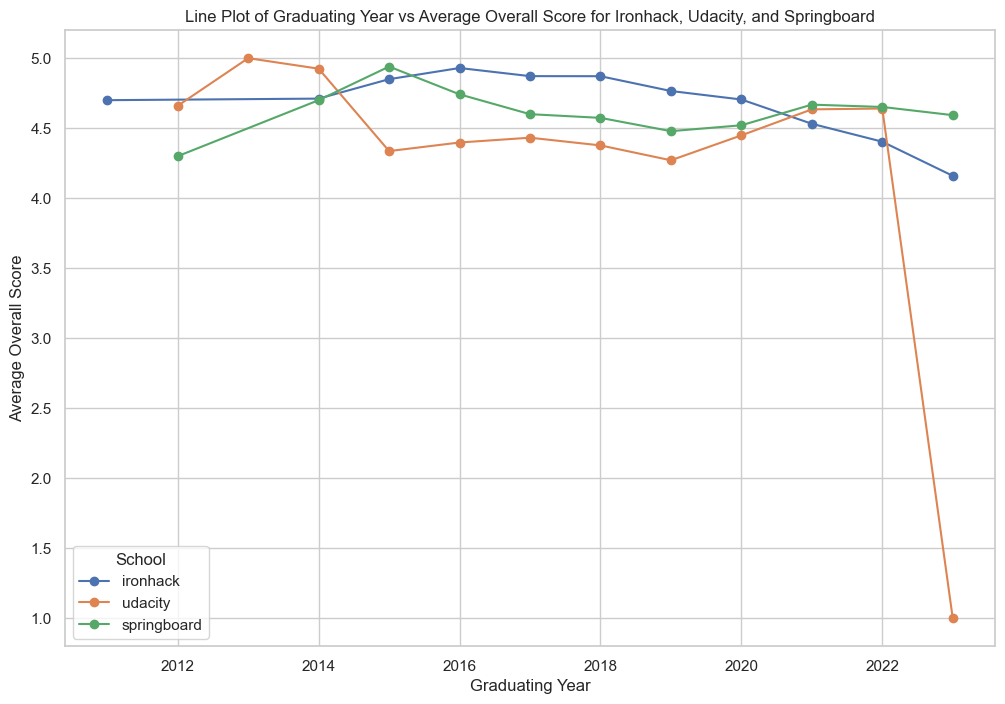

In [32]:
# Plot between Ironhack, Udacity and Springboard with their average OverallScore and graduating year

# Set the overall style
plt.figure(figsize=(12, 8))

# Select only 'ironhack,' 'udacity,' and 'springboard'
selected_schools = ['ironhack', 'udacity', 'springboard']
selected_data = comments[comments['school'].isin(selected_schools)]

# Calculate the average overall score per school and year
average_scores = selected_data.groupby(['school', 'graduatingYear'])['overallScore'].mean().reset_index()

# Plot each selected school separately
for school in selected_schools:
    school_data = average_scores[average_scores['school'] == school]
    plt.plot(school_data['graduatingYear'], school_data['overallScore'], label=school, marker='o', linestyle='-')

plt.xlabel('Graduating Year')
plt.ylabel('Average Overall Score')
plt.title('Line Plot of Graduating Year vs Average Overall Score for Ironhack, Udacity, and Springboard')
plt.legend(title='School')
plt.show()

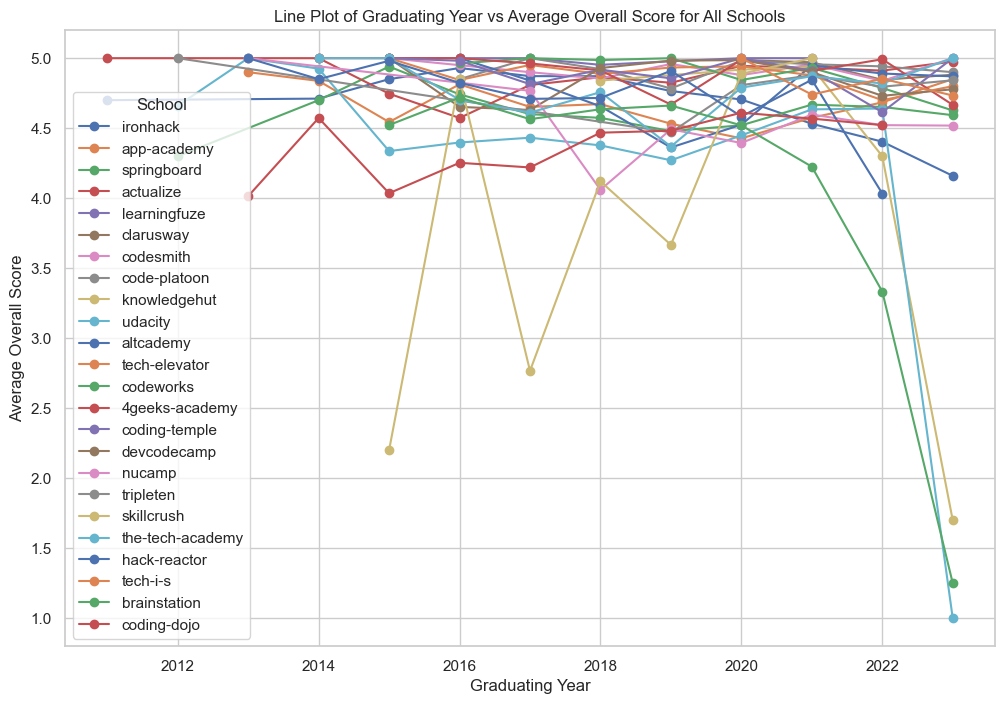

In [33]:
# Set the overall style
plt.figure(figsize=(12, 8))

# Calculate the average overall score per school and year
average_scores = comments.groupby(['school', 'graduatingYear'])['overallScore'].mean().reset_index()

# Plot each school separately
for school in comments['school'].unique():
    school_data = average_scores[average_scores['school'] == school]
    plt.plot(school_data['graduatingYear'], school_data['overallScore'], label=school, marker='o', linestyle='-')

plt.xlabel('Graduating Year')
plt.ylabel('Average Overall Score')
plt.title('Line Plot of Graduating Year vs Average Overall Score for All Schools')
plt.legend(title='School')
plt.show()

In [34]:
program_counts = comments['program'].value_counts()

# Display the different programs and their counts
print("Program Counts:")
print(program_counts)

Program Counts:
Software Engineer Track: In-Person                                           794
Full-time Web Development Bootcamp                                           362
Software Engineering Immersive                                               323
UI/UX Design Career Track                                                    317
Data Science Career Track                                                    306
                                                                            ... 
Java Bootcamp - Fall 2020 (CLE, CBUS, CINCY, DET, PGH, PHL) 9/14 - 12/18       1
Java Bootcamp - Spring 2020 (PHL) 1/27 - 5/1                                   1
.NET Bootcamp - Summer 2020 (CLE, CBUS, CINCY, DET, PGH) 5/11 - 8/14           1
Java Bootcamp - Summer 2020 (CLE, CBUS, CINCY, DET, PGH, PHL) 5/11 - 8/14      1
Dev Accelerators                                                               1
Name: program, Length: 263, dtype: int64


In [35]:
program_overall_scores = comments.groupby('program')['overallScore'].mean().sort_values(ascending=False)

# Display the overall scores for each program in descending order
print("Overall Scores for Each Program (Descending Order):")
print(program_overall_scores)

Overall Scores for Each Program (Descending Order):
program
.NET Bootcamp - Summer 2020 (CLE, CBUS, CINCY, DET, PGH) 5/11 - 8/14         5.0
Full Time JavaScript 10-Week Bootcamp                                        5.0
Java/.NET Bootcamp                                                           5.0
Java Bootcamp - Summer 2020 (CLE, CBUS, CINCY, DET, PGH, PHL) 5/11 - 8/14    5.0
Java Bootcamp - Spring 2020 (PHL) 1/27 - 5/1                                 5.0
                                                                            ... 
Data Science Bootcamp                                                        2.0
Excel                                                                        1.3
Digital Marketing Bootcamp                                                   1.0
C++                                                                          1.0
Product Management Course                                                    1.0
Name: overallScore, Length: 263, dtype: float64


In [36]:
# Find the top 5 programs based on counts
top_programs = program_counts.head(5).index

# Filter the DataFrame for the top 5 programs
top_programs_data = comments[comments['program'].isin(top_programs)]

# Calculate the mean overall score for each top program
top_programs_overall_scores = top_programs_data.groupby('program')['overallScore'].mean()

# Display the overall scores for the top 5 programs
print("Overall Scores for the Top 5 Programs:")
print(top_programs_overall_scores)

Overall Scores for the Top 5 Programs:
program
Data Science Career Track              4.562092
Full-time Web Development Bootcamp     4.912707
Software Engineer Track: In-Person     4.594325
Software Engineering Immersive         4.830341
UI/UX Design Career Track              4.605678
Name: overallScore, dtype: float64


In [37]:
selected_schools = ['ironhack', 'udacity', 'springboard']

# Filter the DataFrame for the specified schools
selected_courses = courses[courses['school'].isin(selected_schools)]

# Display the different courses for each school
for school in selected_schools:
    school_courses = selected_courses[selected_courses['school'] == school]['courses'].unique()
    print(f"{school} Courses:")
    print(school_courses)
    print()

ironhack Courses:
['Cyber Security Bootcamp' 'Cybersecurity Part-Time'
 'Data Analytics Bootcamp' 'Data Analytics Part-Time'
 'UX/UI Design Bootcamp' 'UX/UI Design Part-Time'
 'Web Development Bootcamp' 'Web Development Part-Time']

udacity Courses:
['AI Programming with Python' 'Al Product Manager' 'Android Basics'
 'Android Developer' 'Artificial Intelligence'
 'Artificial Intelligence for Trading' 'Blockchain Developer'
 'Business Analytics' 'C++' 'Cloud Dev Ops Engineer' 'Cloud Developer'
 'Computer Vision' 'Data Analyst' 'Data Engineer'
 'Data Structures and Algorithms' 'Data Visualization' 'Deep Learning'
 'Deep Reinforcement Learning' 'Digital Marketing'
 'Front End Web Developer' 'Full Stack Web Developer'
 'Introduction to Machine Learning' 'Introduction to Programming'
 'iOS Developer' 'Java Developer' 'Machine Learning Engineer'
 'Marketing Analytics' 'Natural Language Processing'
 'Predictive Analytics for Business' 'React' 'Robotics Software Engineer'
 'Self-Driving Car En

In [38]:
# Comparing Ironhack courses with the top 2 school (avg.OverallScore)

selected_schools = ['ironhack', 'learningfuze', 'code-platoon']

# Filter the DataFrame for the specified schools
selected_courses = courses[courses['school'].isin(selected_schools)]

# Display the different courses for each school
for school in selected_schools:
    school_courses = selected_courses[selected_courses['school'] == school]['courses'].unique()
    print(f"{school} Courses:")
    print(school_courses)
    print()

ironhack Courses:
['Cyber Security Bootcamp' 'Cybersecurity Part-Time'
 'Data Analytics Bootcamp' 'Data Analytics Part-Time'
 'UX/UI Design Bootcamp' 'UX/UI Design Part-Time'
 'Web Development Bootcamp' 'Web Development Part-Time']

learningfuze Courses:
['Full Immersion 14-Week Program' 'LFZ Prep Course'
 'Part Time Comprehensive Program' 'UI/UX Design' 'Data Science Part-Time']

code-platoon Courses:
['DevOps Cloud Engineering'
 'Full-Stack Software Engineering: Evenings & Weekends'
 'Full-Stack Software Engineering: Immersive']



In [39]:
# Different services for Ironhack and the 2 schools (avg.OverallScore)

selected_schools = ['ironhack', 'learningfuze', 'code-platoon']

# Filter the DataFrame for the specified schools
selected_badges = badges[badges['school'].isin(selected_schools)]

# Display the selected badges
print("Selected Badges:")
print(selected_badges)

Selected Badges:
              keyword        school  school_id
0    available_online      ironhack      10828
1   verified_outcomes      ironhack      10828
2    flexible_classes      ironhack      10828
11   available_online  learningfuze      10862
12   flexible_classes  learningfuze      10862
18   available_online  code-platoon      10627
19  verified_outcomes  code-platoon      10627
20   flexible_classes  code-platoon      10627
21    accepts_gi_bill  code-platoon      10627
22   vet_tec_provider  code-platoon      10627


In [40]:
code_platoon_comments = comments[comments['school'] == 'code-platoon']

# Display the comments for the school 'code-platoon'
print("Comments for Code Platoon:")
display(code_platoon_comments)

Comments for Code Platoon:


,graduatingYear,jobTitle,tagline,program,overallScore,overall,curriculum,jobSupport,review_body,school
5218,2023.0,Software Developer,"Excellently structured, no fluff, information ...",Full-Stack Software Engineering: Immersive,5.0,5.0,5.0,5.0,Code Platoon immersive full time Full Stack De...,code-platoon
5219,2023.0,NaN,Incredible growth with something to show for it.,Full-Stack Software Engineering: Immersive,5.0,5.0,5.0,5.0,Code platoon is an intense coding boot camp to...,code-platoon
5220,2023.0,NaN,Fantastic experience to build a foundation in ...,Full-Stack Software Engineering: Immersive,4.7,5.0,5.0,4.0,I would highly recommend Code Platoon to any s...,code-platoon
5221,2023.0,NaN,Code Platoon offers an incredible opportunity ...,NaN,4.7,5.0,4.0,5.0,"Pros: - The staff, instructors, and fellow stu...",code-platoon
5222,2023.0,Software Developer,Best Bootcamp for Veterans / Military for Soft...,Full-Stack Software Engineering: Immersive,4.7,5.0,5.0,4.0,I recently Graduated from Code Platoon in thei...,code-platoon
...,...,...,...,...,...,...,...,...,...,...
5322,2017.0,NaN,Great Experience,Web Developer,5.0,5.0,5.0,5.0,The curriculum at code platoon was fast-paced ...,code-platoon
5323,2017.0,Software Engineer,Unparalleled Quality,Web Developer,5.0,5.0,5.0,5.0,I am a Marine Veteran. I've spent 5 years in S...,code-platoon
5324,2016.0,NaN,The Right Choice.,Web Developer,5.0,5.0,5.0,5.0,I could not ask for anything better without be...,code-platoon
5325,2016.0,Software engineer intern,Code Platoon Alpha Platoon,Web Developer,4.7,5.0,4.0,5.0,This program is great. Almost everyone in my c...,code-platoon


In [41]:
# Assuming your DataFrame is named 'comments'
# Set display options to show the entire content of 'review_body'
pd.set_option('display.max_colwidth', None)

# Remove leading and trailing whitespaces from 'review_body' for the school 'code-platoon'
code_platoon_review_body = comments.loc[comments['school'] == 'code-platoon', 'review_body'].str.strip()

# Display the 'review_body' for the school 'code-platoon'
print("Review Body for Code Platoon:")
print(code_platoon_review_body)

Review Body for Code Platoon:
5218                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [42]:
# Location of each school

selected_schools = ['ironhack', 'learningfuze', 'code-platoon']

# Filter the DataFrame for the specified schools
selected_locations = locations[locations['school'].isin(selected_schools)]

# Group by 'school' and get unique country names for the selected schools
selected_school_country_names = selected_locations.groupby('school')['country.name'].unique()

# Display the country name for each selected school
print("Country Name for Selected Schools:")
print(selected_school_country_names)


Country Name for Selected Schools:
school
code-platoon                                                                   [United States, nan]
ironhack        [Germany, Mexico, Netherlands, Brazil, France, United States, Spain, Portugal, nan]
learningfuze                                                                   [United States, nan]
Name: country.name, dtype: object


In [43]:
selected_schools = ['ironhack', 'learningfuze', 'code-platoon']

# Filter the DataFrame for the specified schools
selected_locations = locations[locations['school'].isin(selected_schools)]

# Group by 'school' and get unique country and city names for the selected schools
selected_school_locations = selected_locations.groupby('school')[['country.name', 'city.name']].agg(lambda x: x.unique().tolist())

# Display the country and city names for each selected school
print("Country and City Names for Selected Schools:")
print(selected_school_locations)

Country and City Names for Selected Schools:
                                                                                     country.name  \
school                                                                                              
code-platoon                                                                 [United States, nan]   
ironhack      [Germany, Mexico, Netherlands, Brazil, France, United States, Spain, Portugal, nan]   
learningfuze                                                                 [United States, nan]   

                                                                                              city.name  
school                                                                                                   
code-platoon                                                                             [Chicago, nan]  
ironhack      [Berlin, Mexico City, Amsterdam, Sao Paulo, Paris, Miami, Madrid, Barcelona, Lisbon, nan]  
learningfuze             